<a href="https://colab.research.google.com/github/HS587885/Studying-MachineLearning/blob/main/CNN_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn.init

ModuleNotFoundError: No module named 'torch'

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device == 'cuda':
    torch.cuda.manual_seed_all(777)


In [ ]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
mnist_train = datasets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = datasets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 163307138.82it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 22583089.83it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 42941977.73it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6488599.72it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [ ]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)


In [ ]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        # 첫번째층
        # ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 두번째층
        # ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 전결합층 7x7x64 inputs -> 10 outputs
        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)

        # 전결합층 한정으로 가중치 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)   # 전결합층을 위해서 Flatten
        out = self.fc(out)
        return out


In [ ]:
model = CNN().to(device)

In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


total_batch = len(data_loader)


In [ ]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[Epoch:    1] cost = 0.219945565
[Epoch:    2] cost = 0.0648259744
[Epoch:    3] cost = 0.0469245762
[Epoch:    4] cost = 0.0374301672
[Epoch:    5] cost = 0.0307674278
[Epoch:    6] cost = 0.0255581178
[Epoch:    7] cost = 0.0218925588
[Epoch:    8] cost = 0.018264832
[Epoch:    9] cost = 0.0159337539
[Epoch:   10] cost = 0.0132685434
[Epoch:   11] cost = 0.0114230476
[Epoch:   12] cost = 0.0095668938
[Epoch:   13] cost = 0.0091349557
[Epoch:   14] cost = 0.00702275336
[Epoch:   15] cost = 0.00602332642


In [ ]:
# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

#Accuracy: 0.983199954032898

Accuracy: 0.981499969959259


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# MNIST CSV 파일

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers



from tensorflow.keras.applications import EfficientNetB2

In [ ]:
mnist_train = pd.read_csv('/content/sample_data/mnist_train_small.csv')
mnist_test = pd.read_csv('/content/sample_data/mnist_test.csv')

In [ ]:
mnist_train.shape, mnist_test.shape

((19999, 785), (9999, 785))

In [ ]:
train_images = mnist_train.iloc[:, 1:]
train_labels = mnist_train.iloc[:, 0]
test_images = mnist_test.iloc[:, 1:]
test_labels = mnist_test.iloc[:, 0]

In [ ]:
train_images.shape, train_labels.shape

((19999, 784), (19999,))

In [ ]:
test_images.shape, test_labels.shape

((9999, 784), (9999,))

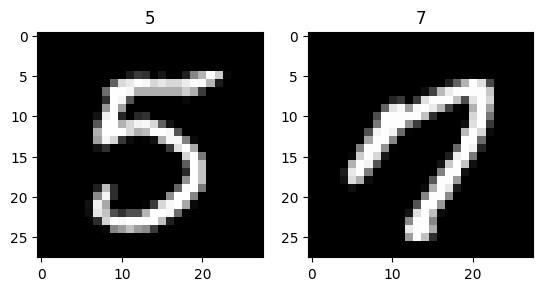

In [ ]:
# Visualize the first and second images
plt.subplot(1, 2, 1)  # Subplot 1
plt.imshow(train_images.loc[0].values.reshape(28, 28), cmap='gray')
plt.title(f'{train_labels.loc[0]}')

plt.subplot(1, 2, 2)  # Subplot 2
plt.imshow(train_images.loc[1].values.reshape(28, 28), cmap='gray')
plt.title(f'{train_labels.loc[1]}')

plt.show()

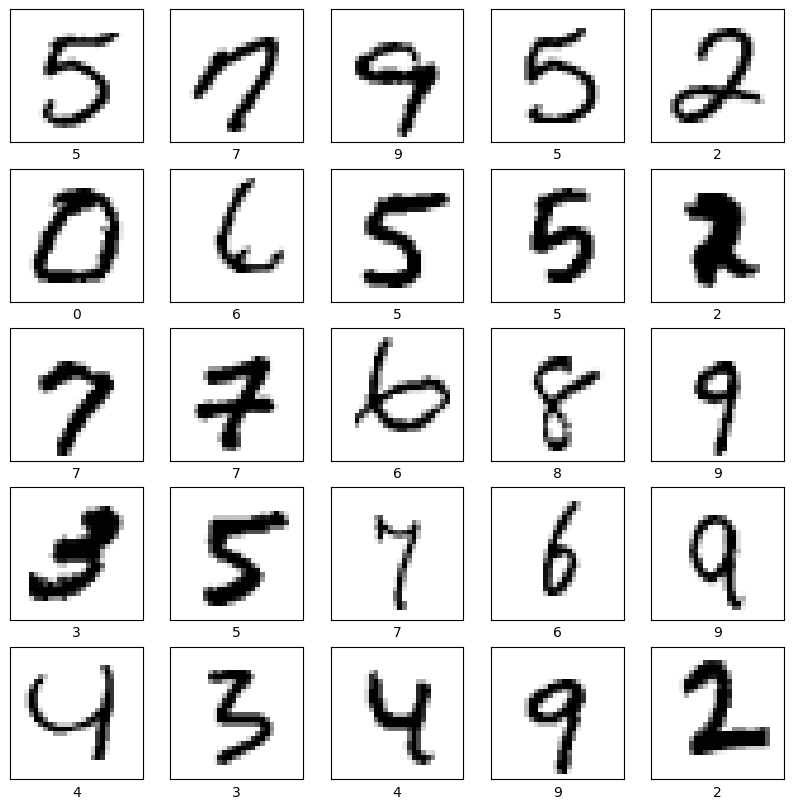

In [ ]:
# Sample images visualization
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images.values[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels.values[i])
plt.show()

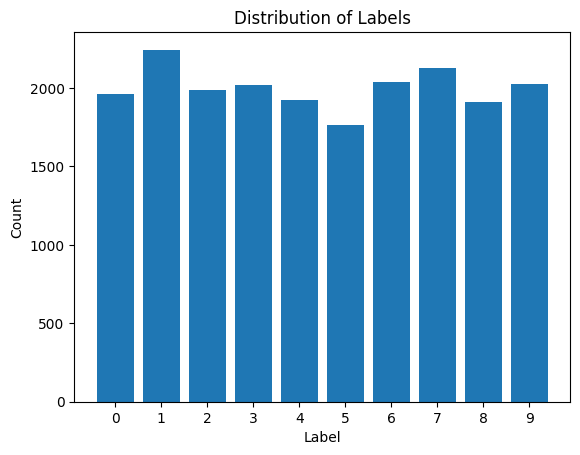

In [ ]:
# Distribution of labels
plt.hist(train_labels, bins=range(11), rwidth=0.8, align='left')
plt.xticks(range(10))
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

In [ ]:
# Statistics
print("Minimum pixel value:", np.min(train_images.values))
print("Maximum pixel value:", np.max(train_images.values))
print("Mean pixel value:", np.mean(train_images.values))
print("Standard deviation of pixel values:", np.std(train_images.values))

Minimum pixel value: 0
Maximum pixel value: 255
Mean pixel value: 33.32772448571408
Standard deviation of pixel values: 78.60042309323919


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add a channel dimension
train_images = train_images.values.reshape(-1, 28, 28, 1)
test_images = test_images.values.reshape(-1, 28, 28, 1)

In [ ]:
# Create TensorFlow datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(10000).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)

In [ ]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

In [ ]:
# Compile the model
model.compile(optimizer='Adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=25)


Epoch 1/25
313/313 [==============================] - 11s 30ms/step - loss: 0.3048 - accuracy: 0.9095
Epoch 2/25
313/313 [==============================] - 10s 32ms/step - loss: 0.0833 - accuracy: 0.9729
Epoch 3/25
313/313 [==============================] - 9s 29ms/step - loss: 0.0552 - accuracy: 0.9820
Epoch 4/25
313/313 [==============================] - 10s 33ms/step - loss: 0.0396 - accuracy: 0.9875
Epoch 5/25
313/313 [==============================] - 9s 30ms/step - loss: 0.0298 - accuracy: 0.9900
Epoch 6/25
313/313 [==============================] - 9s 30ms/step - loss: 0.0250 - accuracy: 0.9915
Epoch 7/25
313/313 [==============================] - 9s 30ms/step - loss: 0.0184 - accuracy: 0.9931
Epoch 8/25
313/313 [==============================] - 9s 30ms/step - loss: 0.0139 - accuracy: 0.9953
Epoch 9/25
313/313 [==============================] - 10s 31ms/step - loss: 0.0117 - accuracy: 0.9963
Epoch 10/25
313/313 [==============================] - 9s 28ms/step - loss: 0.0103 - ac

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print('\nTest accuracy:', test_acc)

157/157 - 1s - loss: 0.0503 - accuracy: 0.9892 - 1s/epoch - 10ms/step

Test accuracy: 0.9891989231109619


In [ ]:
import numpy as np


class MixupGenerator():
    def __init__(self, X_train, y_train, batch_size=32, alpha=0.2, shuffle=True, datagen=None):
        self.X_train = X_train
        self.y_train = y_train
        self.batch_size = batch_size
        self.alpha = alpha
        self.shuffle = shuffle
        self.sample_num = len(X_train)
        self.datagen = datagen

    def __call__(self):
        while True:
            indexes = self.__get_exploration_order()
            itr_num = int(len(indexes) // (self.batch_size * 2))

            for i in range(itr_num):
                batch_ids = indexes[i * self.batch_size * 2:(i + 1) * self.batch_size * 2]
                X, y = self.__data_generation(batch_ids)

                yield X, y

    def __get_exploration_order(self):
        indexes = np.arange(self.sample_num)

        if self.shuffle:
            np.random.shuffle(indexes)

        return indexes

    def __data_generation(self, batch_ids):
        _, h, w, c = self.X_train.shape
        l = np.random.beta(self.alpha, self.alpha, self.batch_size)
        X_l = l.reshape(self.batch_size, 1, 1, 1)
        y_l = l.reshape(self.batch_size, 1)

        X1 = self.X_train[batch_ids[:self.batch_size]]
        X2 = self.X_train[batch_ids[self.batch_size:]]
        X = X1 * X_l + X2 * (1 - X_l)

        if self.datagen:
            for i in range(self.batch_size):
                X[i] = self.datagen.random_transform(X[i])
                X[i] = self.datagen.standardize(X[i])

        if isinstance(self.y_train, list):
            y = []

            for y_train_ in self.y_train:
                y1 = y_train_[batch_ids[:self.batch_size]]
                y2 = y_train_[batch_ids[self.batch_size:]]
                y.append(y1 * y_l + y2 * (1 - y_l))
        else:
            y1 = self.y_train[batch_ids[:self.batch_size]]
            y2 = self.y_train[batch_ids[self.batch_size:]]
            y = y1 * y_l + y2 * (1 - y_l)

        return X, y

In [ ]:
# This code is modified from Keras example https://github.com/fchollet/keras/blob/master/examples/cifar10_resnet.py


from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import MaxPooling2D, AveragePooling2D, Input, Flatten
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os

use_mixup = True
lr_schedule = [60, 120]


def schedule(epoch_idx):
    if (epoch_idx + 1) < lr_schedule[0]:
        return 0.02
    elif (epoch_idx + 1) < lr_schedule[1]:
        return 0.004
    return 0.0008

# Training params.
batch_size = 128
epochs = 200

# Network architecture params.
num_classes = 10
num_filters = 64
num_blocks = 4
num_sub_blocks = 2
use_max_pool = False

# Load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Input image dimensions.
# We assume data format "channels_last".
img_rows = x_train.shape[1]
img_cols = x_train.shape[2]
channels = x_train.shape[3]

if K.image_data_format() == 'channels_first':
    img_rows = x_train.shape[2]
    img_cols = x_train.shape[3]
    channels = x_train.shape[1]
    x_train = x_train.reshape(x_train.shape[0], channels, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], channels, img_rows, img_cols)
    input_shape = (channels, img_rows, img_cols)
else:
    img_rows = x_train.shape[1]
    img_cols = x_train.shape[2]
    channels = x_train.shape[3]
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
    input_shape = (img_rows, img_cols, channels)

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Start model definition.
inputs = Input(shape=input_shape)
x = Conv2D(num_filters,
           kernel_size=7,
           padding='same',
           strides=2,
           kernel_initializer='he_normal',
           kernel_regularizer=l2(1e-4))(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Orig paper uses max pool after 1st conv.
# Reaches up 87% acc if use_max_pool = True.
# Cifar10 images are already too small at 32x32 to be maxpooled. So, we skip.
if use_max_pool:
    x = MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
    num_blocks = 3

# Instantiate convolutional base (stack of blocks).
for i in range(num_blocks):
    for j in range(num_sub_blocks):
        strides = 1
        is_first_layer_but_not_first_block = j == 0 and i > 0
        if is_first_layer_but_not_first_block:
            strides = 2
        y = Conv2D(num_filters,
                   kernel_size=3,
                   padding='same',
                   strides=strides,
                   kernel_initializer='he_normal',
                   kernel_regularizer=l2(1e-4))(x)
        y = BatchNormalization()(y)
        y = Activation('relu')(y)
        y = Conv2D(num_filters,
                   kernel_size=3,
                   padding='same',
                   kernel_initializer='he_normal',
                   kernel_regularizer=l2(1e-4))(y)
        y = BatchNormalization()(y)
        if is_first_layer_but_not_first_block:
            x = Conv2D(num_filters,
                       kernel_size=1,
                       padding='same',
                       strides=2,
                       kernel_initializer='he_normal',
                       kernel_regularizer=l2(1e-4))(x)
        x = keras.layers.add([x, y])
        x = Activation('relu')(x)

    num_filters = 2 * num_filters

# Add classifier on top.
x = AveragePooling2D()(x)
y = Flatten()(x)
outputs = Dense(num_classes,
                activation='softmax',
                kernel_initializer='he_normal')(y)

# Instantiate and compile model.
model = Model(inputs=inputs, outputs=outputs)
sgd = SGD(lr=0.1, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
model.summary()

# Prepare model model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_resnet_model.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate decaying.
checkpoint = ModelCheckpoint(filepath=filepath,
                             verbose=1,
                             save_best_only=True)
scheduler = LearningRateScheduler(schedule=schedule)
callbacks = [checkpoint, scheduler]

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

if use_mixup:
    training_generator = MixupGenerator(x_train, y_train, batch_size=batch_size, alpha=0.2, datagen=datagen)()
    model.fit_generator(generator=training_generator,
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        validation_data=(x_test, y_test),
                        epochs=epochs, verbose=1,
                        callbacks=callbacks)
else:
    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        validation_data=(x_test, y_test),
                        epochs=epochs, verbose=1, workers=4,
                        callbacks=callbacks)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/Users/hyunghoon/miniconda3/envs/tony/lib/python3.11/site-packages/keras/preprocessing/image/__init__.py)

In [ ]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf


In [ ]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
IMAGE_SIZE = (150, 150)

In [ ]:
## Thanks to Vincent for this function - https://www.kaggle.com/vincee/intel-image-classification-cnn-keras

## Function definition
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """

    datasets = ['/Users/hyunghoon/Downloads/view_data/seg_train/', '/Users/hyunghoon/Downloads/view_data/seg_test/']
    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            curr_label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in os.listdir(os.path.join(dataset, folder)):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(curr_img)
                labels.append(curr_label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

## Function Call
(train_images, train_labels), (test_images, test_labels) = load_data()


Loading /Users/hyunghoon/Downloads/view_data/seg_train/


KeyError: '.DS_Store'

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images, train_labels = shuffle(train_images, train_labels)

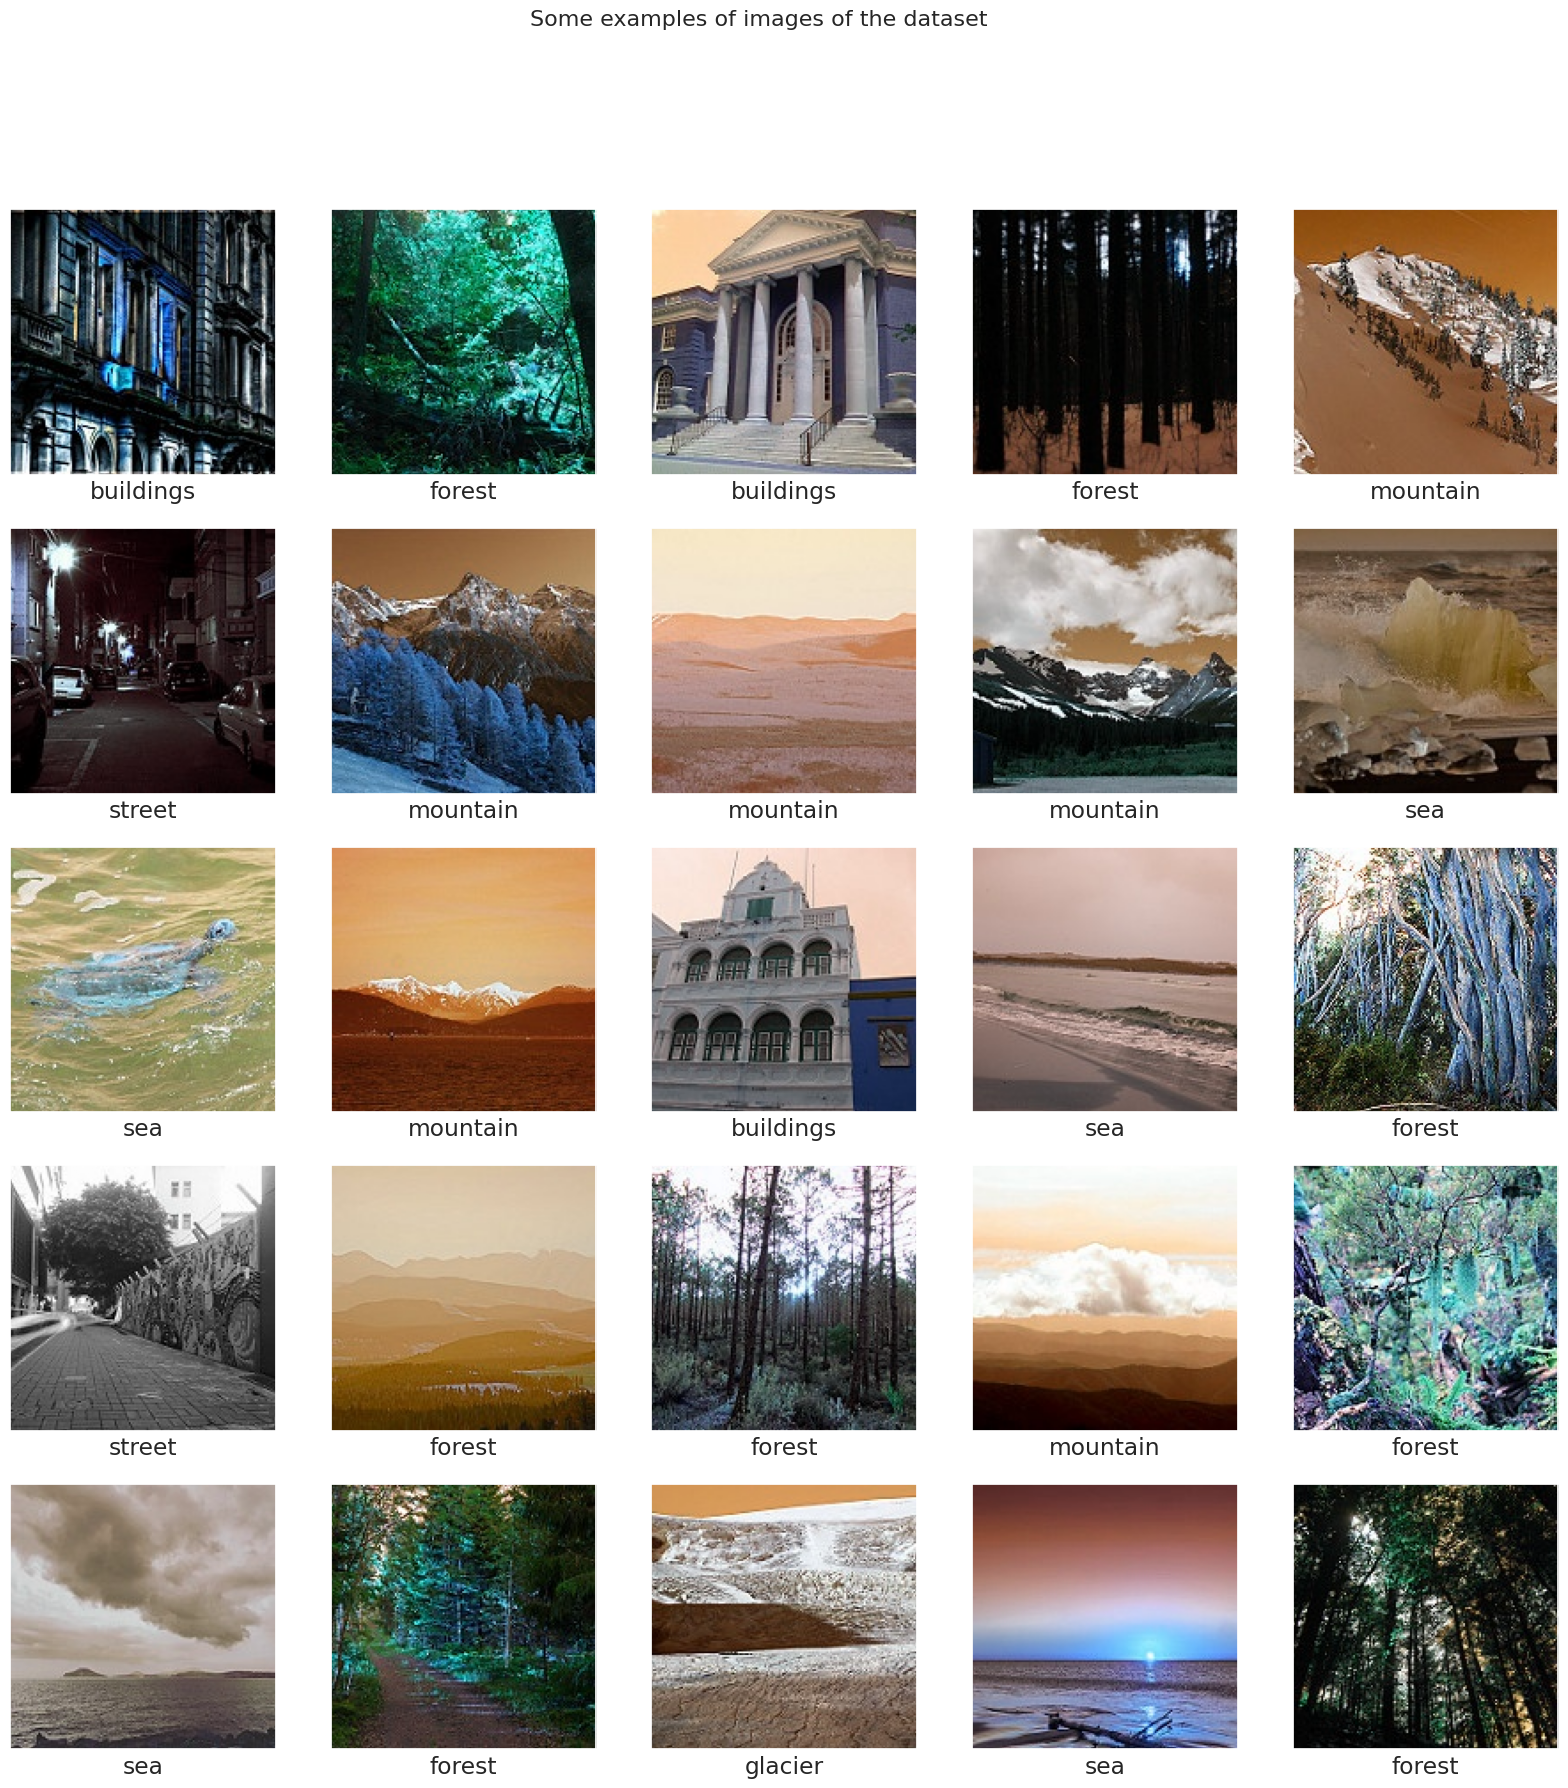

In [ ]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(20,20))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i]])
    plt.show()

    ## Function call
display_examples(class_names, train_images, train_labels)


In [ ]:
from keras import utils
y_train = utils.to_categorical(train_labels, 6)
y_test = utils.to_categorical(test_labels, 6)

In [ ]:
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, BatchNormalization, Dropout, MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

vgg_conv = VGG16(weights='imagenet',
                  include_top=False,input_shape=(150,150,3))
## Disabling training from VGG layers
vgg_conv.trainable=False

## Instantiating model
vgg_conv.trainable=False
transfer_model = Sequential()
transfer_model.add(vgg_conv)
transfer_model.add(Flatten())
transfer_model.add(Dropout(0.25))
transfer_model.add(Dense(64, activation='relu'))
transfer_model.add(Dropout(0.25))
transfer_model.add(Dense(6, activation='softmax'))


## Model summary
transfer_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_2 (Dropout)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                524352    
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 15239430 (58.13 MB)
Trainable params: 52

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

transfer_model.compile(optimizer,loss='binary_crossentropy',metrics=["accuracy"])

## I know binary_crossentropy is not recommended for multiclass problems.
## But I saw somebody use it and surprisingly it gave better results.

In [ ]:
train_gen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# fits the model on batches with real-time data augmentation:
history = transfer_model.fit_generator(train_gen.flow(train_images, y_train, batch_size=32),
                              steps_per_epoch=len(train_images) / 32, epochs=3,
                              validation_data = (test_images, y_test))

<ipython-input-15-44cf8c8a7915>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = transfer_model.fit_generator(train_gen.flow(train_images, y_train, batch_size=32),


Epoch 1/3
438/438 [==============================] - 114s 239ms/step - loss: 0.2299 - accuracy: 0.7217 - val_loss: 0.1296 - val_accuracy: 0.8570
Epoch 2/3
438/438 [==============================] - 98s 223ms/step - loss: 0.1753 - accuracy: 0.7942 - val_loss: 0.1347 - val_accuracy: 0.8350
Epoch 3/3
438/438 [==============================] - 101s 229ms/step - loss: 0.1659 - accuracy: 0.8004 - val_loss: 0.1219 - val_accuracy: 0.8500


In [ ]:
score = model.evaluate(X_test, y_test)
print("\nTest loss:", score[0])
print('Test accuracy:', score[1])

In [ ]:
import tensorflow as tf

cifar = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar.load_data()
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_shape=(32, 32, 3),
    classes=100,)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, batch_size=64)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 70s 0us/step
Epoch 1/5
263/782 ━━━━━━━━━━━━━━━━━━━━ 4:52 563ms/step - accuracy: 0.0341 - loss: 5.4512